<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Cluster-analysis-of-final-data-set" data-toc-modified-id="Cluster-analysis-of-final-data-set-1">Cluster analysis of final data set</a></span><ul class="toc-item"><li><span><a href="#01-Import-libraries-and-data" data-toc-modified-id="01-Import-libraries-and-data-1.1">01 Import libraries and data</a></span></li><li><span><a href="#02-Data-wrangling" data-toc-modified-id="02-Data-wrangling-1.2">02 Data wrangling</a></span></li><li><span><a href="#03-Data-consistency-checks" data-toc-modified-id="03-Data-consistency-checks-1.3">03 Data consistency checks</a></span><ul class="toc-item"><li><span><a href="#Missing-values" data-toc-modified-id="Missing-values-1.3.1">Missing values</a></span></li><li><span><a href="#Check-for-duplicates" data-toc-modified-id="Check-for-duplicates-1.3.2">Check for duplicates</a></span></li></ul></li><li><span><a href="#04-The-elbow-technique" data-toc-modified-id="04-The-elbow-technique-1.4">04 The elbow technique</a></span></li><li><span><a href="#05-k-means-clustering" data-toc-modified-id="05-k-means-clustering-1.5">05 k-means clustering</a></span></li><li><span><a href="#06-Scatterplots-comparing-differnt-variables" data-toc-modified-id="06-Scatterplots-comparing-differnt-variables-1.6">06 Scatterplots comparing differnt variables</a></span></li><li><span><a href="#07-Merge-cluster-column-with-orgional-data-set" data-toc-modified-id="07-Merge-cluster-column-with-orgional-data-set-1.7">07 Merge cluster column with orgional data set</a></span></li></ul></li></ul></div>

# Cluster analysis of final data set

## 01 Import libraries and data

In [71]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans 
import pylab as pl

In [72]:
# command matplotlib visuals to appear in the notebook 

%matplotlib inline

In [73]:
# Create path

path = r'C:\Users\rober_fjs0dbr\OneDrive\Documents\CF Coursework\Advanced Analytics & Dashboard Design\rc_final_project'

In [74]:
# import final data set

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'life_expect_full.csv'))

In [75]:
df.head()

,Unnamed: 0,country,year,life_expectancy,pct_change_life,population,pct_change_pop,gdp,pct_change_gdp,gdp_per_capita,...,pct_change_co2_capita,life_expectancy_flag,population_flag,gdp_flag,gdp_capita_flag,co2_production_flag,co2_per_capita_flag,health_expenditure_pct_gdp,cv_of_calorie_intake,_merge
0,0,Afghanistan,2002,56.784000,0.845354,21000258,6.661833,1.880487e+10,70.623403,895.459054,...,17.609398,Average life,Medium Population,Low GDP,Lower Income,Low co2 Producer,Low co2 per Capita,0.084181,0.30,both
1,1,Afghanistan,2003,57.271000,0.857635,22645136,7.832656,2.107434e+10,12.068537,930.634461,...,7.881138,Average life,Medium Population,Medium GDP,Lower Income,Low co2 Producer,Low co2 per Capita,0.650963,0.29,both
2,2,Afghanistan,2004,57.771999,0.874787,23553554,4.011537,2.233257e+10,5.970424,948.161439,...,-23.763388,Average life,Medium Population,Medium GDP,Lower Income,Low co2 Producer,Low co2 per Capita,0.542926,0.28,both
3,3,Afghanistan,2005,58.290001,0.896631,24411196,3.641242,2.539769e+10,13.724871,1040.411470,...,47.421048,Average life,Medium Population,Medium GDP,Lower Income,Low co2 Producer,Low co2 per Capita,0.529184,0.27,both
4,4,Afghanistan,2006,58.826000,0.919539,25442946,4.226544,2.870440e+10,13.019740,1128.187019,...,9.600491,Average life,Medium Population,Medium GDP,Lower Income,Low co2 Producer,Low co2 per Capita,0.497840,0.26,both


## 02 Data wrangling

In [76]:
# drop columns not necessary for clustyer analysis

df_cluster = df.drop(['Unnamed: 0', 'country', 'life_expectancy_flag', 'population_flag', 'gdp_flag', 'gdp_capita_flag', 'co2_production_flag', 'co2_per_capita_flag', '_merge'], axis=1)

df_cluster.head()

,year,life_expectancy,pct_change_life,population,pct_change_pop,gdp,pct_change_gdp,gdp_per_capita,pct_change_gdp_capita,co2,pct_change_co2,co2_per_capita,pct_change_co2_capita,health_expenditure_pct_gdp,cv_of_calorie_intake
0,2002,56.784000,0.845354,21000258,6.661833,1.880487e+10,70.623403,895.459054,59.966688,1341000.0,25.444341,0.063856,17.609398,0.084181,0.30
1,2003,57.271000,0.857635,22645136,7.832656,2.107434e+10,12.068537,930.634461,3.928198,1560000.0,16.331096,0.068889,7.881138,0.650963,0.29
2,2004,57.771999,0.874787,23553554,4.011537,2.233257e+10,5.970424,948.161439,1.883336,1237000.0,-20.705128,0.052519,-23.763388,0.542926,0.28
3,2005,58.290001,0.896631,24411196,3.641242,2.539769e+10,13.724871,1040.411470,9.729359,1890000.0,52.789006,0.077423,47.421048,0.529184,0.27
4,2006,58.826000,0.919539,25442946,4.226544,2.870440e+10,13.019740,1128.187019,8.436619,2159000.0,14.232804,0.084857,9.600491,0.497840,0.26


In [77]:
df_cluster.describe()

,year,life_expectancy,pct_change_life,population,pct_change_pop,gdp,pct_change_gdp,gdp_per_capita,pct_change_gdp_capita,co2,pct_change_co2,co2_per_capita,pct_change_co2_capita,health_expenditure_pct_gdp,cv_of_calorie_intake
count,2904.000000,2904.000000,2904.000000,2.904000e+03,2904.000000,2.904000e+03,2904.000000,2904.000000,2904.000000,2.904000e+03,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000
mean,2009.006198,69.510081,0.529574,4.404087e+07,1.426196,5.545228e+11,4.497898,14824.777576,3.031971,1.980946e+08,3.515217,4.560193,2.050276,3.181335,0.254752
std,5.466331,9.520038,0.636756,1.500031e+08,1.498877,1.752854e+12,5.046478,15452.110383,4.806681,8.144019e+08,11.251067,5.493829,10.838346,2.169821,0.051215
min,2000.000000,39.441002,-3.913075,6.828100e+04,-4.680475,3.128536e+08,-57.761188,438.610213,-55.687136,4.800000e+04,-46.806662,0.015367,-48.230376,0.062046,0.170000
25%,2004.000000,63.009000,0.218763,4.052891e+06,0.480086,2.206517e+10,2.237852,3149.890690,0.941863,3.888000e+06,-1.710598,0.590657,-2.746259,1.401578,0.210000
50%,2009.000000,72.237999,0.386056,1.024310e+07,1.318156,7.552284e+10,4.238457,9533.110586,2.839567,1.872250e+07,2.198893,2.518832,1.062577,2.667064,0.250000
75%,2014.000000,76.492432,0.720400,3.057419e+07,2.285911,3.525045e+11,6.591017,20665.078549,5.086992,9.692650e+07,7.287400,6.650155,5.828485,4.547094,0.280000
max,2018.000000,84.210976,4.522277,1.417069e+09,19.875337,1.815160e+13,70.623403,84584.308817,59.966688,1.035388e+10,124.107143,34.129913,117.971663,11.574964,0.490000


In [78]:
# reduce population, gdp, and co2 to standardize values

df_cluster['population'] = df_cluster['population']/1000000

df_cluster['gdp'] = df_cluster['gdp']/1000000000

df_cluster['co2'] = df_cluster['co2']/1000000

df_cluster.describe()

,year,life_expectancy,pct_change_life,population,pct_change_pop,gdp,pct_change_gdp,gdp_per_capita,pct_change_gdp_capita,co2,pct_change_co2,co2_per_capita,pct_change_co2_capita,health_expenditure_pct_gdp,cv_of_calorie_intake
count,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000
mean,2009.006198,69.510081,0.529574,44.040865,1.426196,554.522782,4.497898,14824.777576,3.031971,198.094632,3.515217,4.560193,2.050276,3.181335,0.254752
std,5.466331,9.520038,0.636756,150.003082,1.498877,1752.853812,5.046478,15452.110383,4.806681,814.401903,11.251067,5.493829,10.838346,2.169821,0.051215
min,2000.000000,39.441002,-3.913075,0.068281,-4.680475,0.312854,-57.761188,438.610213,-55.687136,0.048000,-46.806662,0.015367,-48.230376,0.062046,0.170000
25%,2004.000000,63.009000,0.218763,4.052891,0.480086,22.065166,2.237852,3149.890690,0.941863,3.888000,-1.710598,0.590657,-2.746259,1.401578,0.210000
50%,2009.000000,72.237999,0.386056,10.243105,1.318156,75.522843,4.238457,9533.110586,2.839567,18.722500,2.198893,2.518832,1.062577,2.667064,0.250000
75%,2014.000000,76.492432,0.720400,30.574186,2.285911,352.504500,6.591017,20665.078549,5.086992,96.926500,7.287400,6.650155,5.828485,4.547094,0.280000
max,2018.000000,84.210976,4.522277,1417.069440,19.875337,18151.600000,70.623403,84584.308817,59.966688,10353.877000,124.107143,34.129913,117.971663,11.574964,0.490000


## 03 Data consistency checks

### Missing values

In [79]:
### Check for missing values

df_cluster.isnull().sum()

year                          0
life_expectancy               0
pct_change_life               0
population                    0
pct_change_pop                0
gdp                           0
pct_change_gdp                0
gdp_per_capita                0
pct_change_gdp_capita         0
co2                           0
pct_change_co2                0
co2_per_capita                0
pct_change_co2_capita         0
health_expenditure_pct_gdp    0
cv_of_calorie_intake          0
dtype: int64

No missing values present

### Check for duplicates

In [80]:
dups = df_cluster.duplicated()

In [81]:
dups.shape

(2904,)

No duplicates present

## 04 The elbow technique

In [82]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above

In [83]:
score = [kmeans[i].fit(df_cluster).score(df_cluster) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-704054179366.5775,
 -206391637290.85126,
 -114018028483.92984,
 -66174477198.96509,
 -45080842062.28439,
 -33716989870.7118,
 -27229466564.03253,
 -23010498108.372063,
 -18698498820.353462]

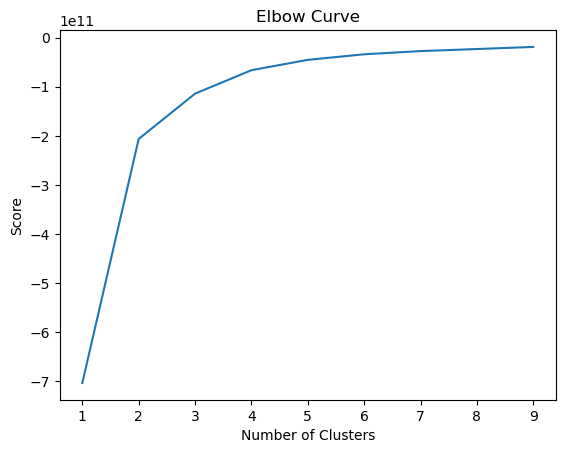

In [84]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

Above we can see that the last large jump in score between 3 and 4 on the x-axis. This means that the optimal count of clusters is 4.

## 05 k-means clustering

In [85]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 4)

In [86]:
# Fit the k-means object to the data.

kmeans.fit(df_cluster)

KMeans(n_clusters=4)

In [87]:
df_cluster['clusters'] = kmeans.fit_predict(df_cluster)

In [88]:
df_cluster.head(25)

,year,life_expectancy,pct_change_life,population,pct_change_pop,gdp,pct_change_gdp,gdp_per_capita,pct_change_gdp_capita,co2,pct_change_co2,co2_per_capita,pct_change_co2_capita,health_expenditure_pct_gdp,cv_of_calorie_intake,clusters
0,2002,56.784000,0.845354,21.000258,6.661833,18.804871,70.623403,895.459054,59.966688,1.341,25.444341,0.063856,17.609398,0.084181,0.30,3
1,2003,57.271000,0.857635,22.645136,7.832656,21.074344,12.068537,930.634461,3.928198,1.560,16.331096,0.068889,7.881138,0.650963,0.29,3
2,2004,57.771999,0.874787,23.553554,4.011537,22.332572,5.970424,948.161439,1.883336,1.237,-20.705128,0.052519,-23.763388,0.542926,0.28,3
3,2005,58.290001,0.896631,24.411196,3.641242,25.397688,13.724871,1040.411470,9.729359,1.890,52.789006,0.077423,47.421048,0.529184,0.27,3
4,2006,58.826000,0.919539,25.442946,4.226544,28.704401,13.019740,1128.187019,8.436619,2.159,14.232804,0.084857,9.600491,0.497840,0.26,3
5,2007,59.375000,0.933260,25.903306,1.809382,34.507530,20.216861,1332.167031,18.080337,2.800,29.689671,0.108094,27.384794,0.559948,0.25,3
6,2008,59.930000,0.934737,26.427204,2.022514,36.561043,5.950913,1383.462415,3.850522,4.254,51.928571,0.160970,48.916710,0.627800,0.24,3
7,2009,60.484001,0.924413,27.385310,3.625454,44.358722,21.327832,1619.799868,17.083041,6.392,50.258580,0.233410,45.001614,0.531904,0.25,3
8,2010,61.028000,0.899409,28.189672,2.937202,47.399424,6.854802,1681.446453,3.805815,8.365,30.866708,0.296740,27.132567,0.469157,0.25,3
9,2011,61.553001,0.860263,29.249156,3.758412,53.326336,12.504186,1823.175205,8.428978,11.838,41.518231,0.404730,36.392055,0.480000,0.26,3


In [89]:
df_cluster['clusters'].value_counts()

3    1617
0     793
2     408
1      86
Name: clusters, dtype: int64

## 06 Scatterplots comparing differnt variables

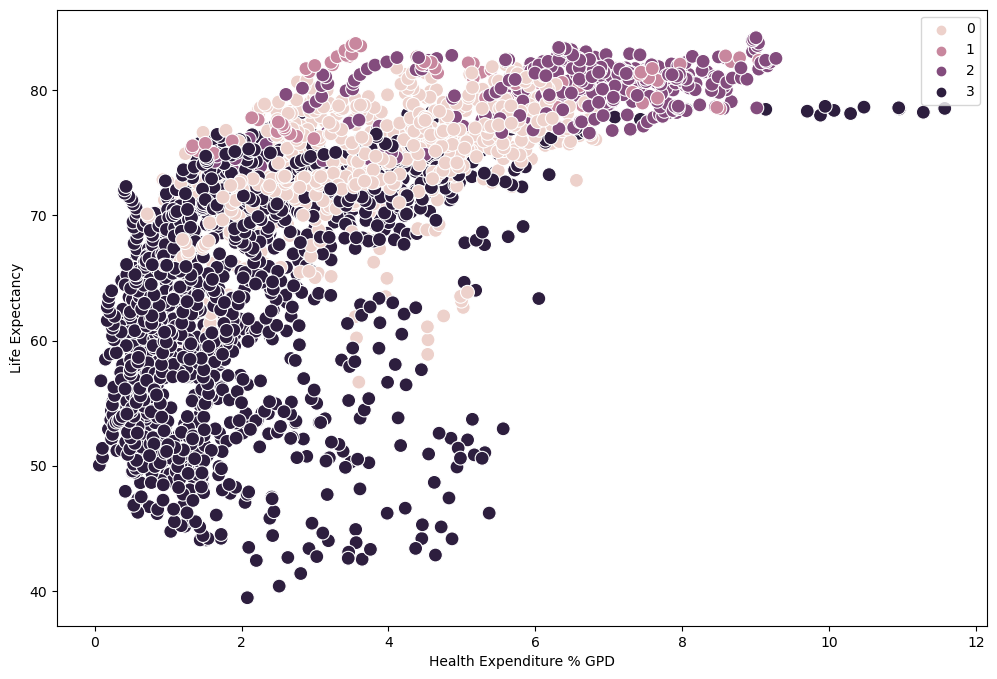

In [90]:
# Plot the clusters for the "life_expectancy" and "gdp_per_capita" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_cluster['health_expenditure_pct_gdp'], y=df_cluster['life_expectancy'], hue=kmeans.labels_, s=100) 


ax.grid(False)
plt.xlabel('Health Expenditure % GPD') 
plt.ylabel('Life Expectancy') 
plt.show()

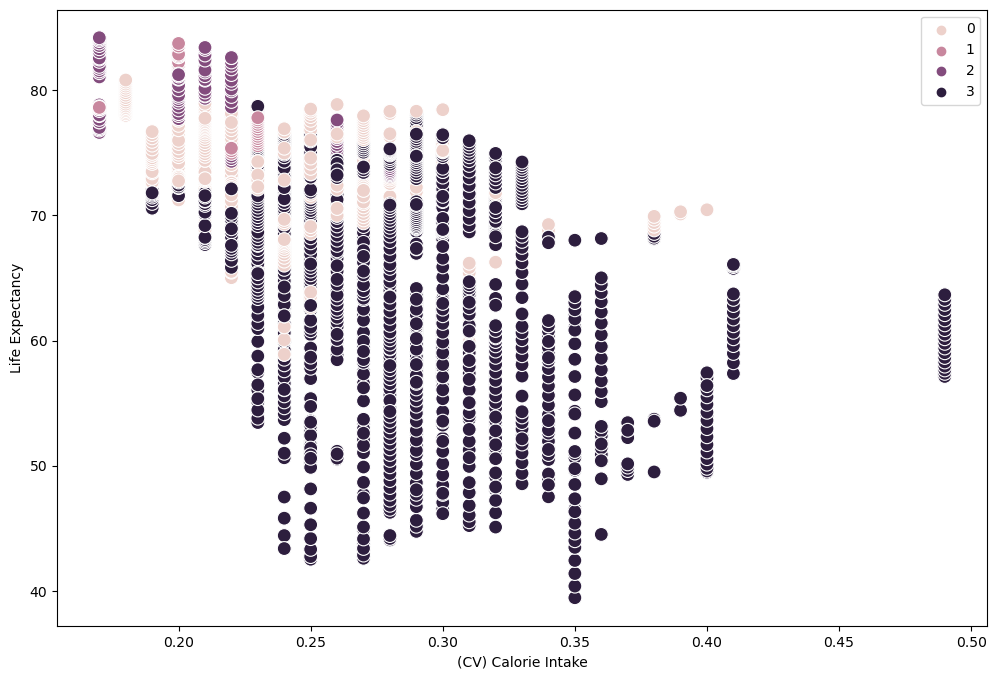

In [91]:
# Plot the clusters for the "life_expectancy" and "gdp_per_capita" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_cluster['cv_of_calorie_intake'], y=df_cluster['life_expectancy'], hue=kmeans.labels_, s=100) 


ax.grid(False)
plt.xlabel('(CV) Calorie Intake') 
plt.ylabel('Life Expectancy') 
plt.show()

## 07 Merge cluster column with orgional data set

In [92]:
df.head()

,Unnamed: 0,country,year,life_expectancy,pct_change_life,population,pct_change_pop,gdp,pct_change_gdp,gdp_per_capita,...,pct_change_co2_capita,life_expectancy_flag,population_flag,gdp_flag,gdp_capita_flag,co2_production_flag,co2_per_capita_flag,health_expenditure_pct_gdp,cv_of_calorie_intake,_merge
0,0,Afghanistan,2002,56.784000,0.845354,21000258,6.661833,1.880487e+10,70.623403,895.459054,...,17.609398,Average life,Medium Population,Low GDP,Lower Income,Low co2 Producer,Low co2 per Capita,0.084181,0.30,both
1,1,Afghanistan,2003,57.271000,0.857635,22645136,7.832656,2.107434e+10,12.068537,930.634461,...,7.881138,Average life,Medium Population,Medium GDP,Lower Income,Low co2 Producer,Low co2 per Capita,0.650963,0.29,both
2,2,Afghanistan,2004,57.771999,0.874787,23553554,4.011537,2.233257e+10,5.970424,948.161439,...,-23.763388,Average life,Medium Population,Medium GDP,Lower Income,Low co2 Producer,Low co2 per Capita,0.542926,0.28,both
3,3,Afghanistan,2005,58.290001,0.896631,24411196,3.641242,2.539769e+10,13.724871,1040.411470,...,47.421048,Average life,Medium Population,Medium GDP,Lower Income,Low co2 Producer,Low co2 per Capita,0.529184,0.27,both
4,4,Afghanistan,2006,58.826000,0.919539,25442946,4.226544,2.870440e+10,13.019740,1128.187019,...,9.600491,Average life,Medium Population,Medium GDP,Lower Income,Low co2 Producer,Low co2 per Capita,0.497840,0.26,both


In [93]:
# drop 'Unnamed: 0' and '_merge'

df = df.drop(['Unnamed: 0', '_merge'], axis=1)

df.head()

,country,year,life_expectancy,pct_change_life,population,pct_change_pop,gdp,pct_change_gdp,gdp_per_capita,pct_change_gdp_capita,...,co2_per_capita,pct_change_co2_capita,life_expectancy_flag,population_flag,gdp_flag,gdp_capita_flag,co2_production_flag,co2_per_capita_flag,health_expenditure_pct_gdp,cv_of_calorie_intake
0,Afghanistan,2002,56.784000,0.845354,21000258,6.661833,1.880487e+10,70.623403,895.459054,59.966688,...,0.063856,17.609398,Average life,Medium Population,Low GDP,Lower Income,Low co2 Producer,Low co2 per Capita,0.084181,0.30
1,Afghanistan,2003,57.271000,0.857635,22645136,7.832656,2.107434e+10,12.068537,930.634461,3.928198,...,0.068889,7.881138,Average life,Medium Population,Medium GDP,Lower Income,Low co2 Producer,Low co2 per Capita,0.650963,0.29
2,Afghanistan,2004,57.771999,0.874787,23553554,4.011537,2.233257e+10,5.970424,948.161439,1.883336,...,0.052519,-23.763388,Average life,Medium Population,Medium GDP,Lower Income,Low co2 Producer,Low co2 per Capita,0.542926,0.28
3,Afghanistan,2005,58.290001,0.896631,24411196,3.641242,2.539769e+10,13.724871,1040.411470,9.729359,...,0.077423,47.421048,Average life,Medium Population,Medium GDP,Lower Income,Low co2 Producer,Low co2 per Capita,0.529184,0.27
4,Afghanistan,2006,58.826000,0.919539,25442946,4.226544,2.870440e+10,13.019740,1128.187019,8.436619,...,0.084857,9.600491,Average life,Medium Population,Medium GDP,Lower Income,Low co2 Producer,Low co2 per Capita,0.497840,0.26


In [94]:
df.shape

(2904, 22)

In [95]:
df_cluster.shape

(2904, 16)

In [96]:
df_cluster.columns

Index(['year', 'life_expectancy', 'pct_change_life', 'population',
       'pct_change_pop', 'gdp', 'pct_change_gdp', 'gdp_per_capita',
       'pct_change_gdp_capita', 'co2', 'pct_change_co2', 'co2_per_capita',
       'pct_change_co2_capita', 'health_expenditure_pct_gdp',
       'cv_of_calorie_intake', 'clusters'],
      dtype='object')

In [97]:
# drop columns from df_cluster

df_cluster = df_cluster.drop(['pct_change_life', 'population',
       'pct_change_pop', 'gdp', 'pct_change_gdp', 'gdp_per_capita',
       'pct_change_gdp_capita', 'co2', 'pct_change_co2', 'co2_per_capita',
       'pct_change_co2_capita', 'health_expenditure_pct_gdp',
       'cv_of_calorie_intake',], axis=1)

df_cluster.head()

,year,life_expectancy,clusters
0,2002,56.784000,3
1,2003,57.271000,3
2,2004,57.771999,3
3,2005,58.290001,3
4,2006,58.826000,3


In [98]:
# merge df_cluster with df

df_full_04 = df.merge(df_cluster, on = ['year', 'life_expectancy'], how = 'inner', indicator = True)

df_full_04.head()

,country,year,life_expectancy,pct_change_life,population,pct_change_pop,gdp,pct_change_gdp,gdp_per_capita,pct_change_gdp_capita,...,life_expectancy_flag,population_flag,gdp_flag,gdp_capita_flag,co2_production_flag,co2_per_capita_flag,health_expenditure_pct_gdp,cv_of_calorie_intake,clusters,_merge
0,Afghanistan,2002,56.784000,0.845354,21000258,6.661833,1.880487e+10,70.623403,895.459054,59.966688,...,Average life,Medium Population,Low GDP,Lower Income,Low co2 Producer,Low co2 per Capita,0.084181,0.30,3,both
1,Afghanistan,2003,57.271000,0.857635,22645136,7.832656,2.107434e+10,12.068537,930.634461,3.928198,...,Average life,Medium Population,Medium GDP,Lower Income,Low co2 Producer,Low co2 per Capita,0.650963,0.29,3,both
2,Afghanistan,2004,57.771999,0.874787,23553554,4.011537,2.233257e+10,5.970424,948.161439,1.883336,...,Average life,Medium Population,Medium GDP,Lower Income,Low co2 Producer,Low co2 per Capita,0.542926,0.28,3,both
3,Afghanistan,2005,58.290001,0.896631,24411196,3.641242,2.539769e+10,13.724871,1040.411470,9.729359,...,Average life,Medium Population,Medium GDP,Lower Income,Low co2 Producer,Low co2 per Capita,0.529184,0.27,3,both
4,Afghanistan,2006,58.826000,0.919539,25442946,4.226544,2.870440e+10,13.019740,1128.187019,8.436619,...,Average life,Medium Population,Medium GDP,Lower Income,Low co2 Producer,Low co2 per Capita,0.497840,0.26,3,both


In [99]:
df_full_04['_merge'].value_counts()

both          2926
left_only        0
right_only       0
Name: _merge, dtype: int64

In [100]:
df_full_04.describe()

,year,life_expectancy,pct_change_life,population,pct_change_pop,gdp,pct_change_gdp,gdp_per_capita,pct_change_gdp_capita,co2,pct_change_co2,co2_per_capita,pct_change_co2_capita,health_expenditure_pct_gdp,cv_of_calorie_intake,clusters
count,2926.000000,2926.000000,2926.000000,2.926000e+03,2926.000000,2.926000e+03,2926.000000,2926.000000,2926.000000,2.926000e+03,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000,2926.000000
mean,2009.011620,69.563298,0.528734,4.391618e+07,1.421656,5.532383e+11,4.489806,14932.200115,3.028581,1.972854e+08,3.483240,4.574426,2.023313,3.194588,0.254511,1.977444
std,5.458268,9.520207,0.636341,1.495242e+08,1.496396,1.746984e+12,5.032568,15542.677404,4.792884,8.114843e+08,11.226777,5.487125,10.814653,2.178185,0.051177,1.295424
min,2000.000000,39.441002,-3.913075,6.828100e+04,-4.680475,3.128536e+08,-57.761188,438.610213,-55.687136,4.800000e+04,-46.806662,0.015367,-48.230376,0.062046,0.170000,0.000000
25%,2004.000000,63.069251,0.218021,4.054439e+06,0.478554,2.211333e+10,2.230241,3167.736460,0.941213,3.905250e+06,-1.730590,0.594761,-2.744537,1.406150,0.210000,0.000000
50%,2009.000000,72.256500,0.385760,1.022678e+07,1.314680,7.585590e+10,4.231723,9617.557967,2.836295,1.898650e+07,2.178141,2.551361,1.023457,2.672922,0.250000,3.000000
75%,2014.000000,76.535437,0.719917,3.052476e+07,2.277174,3.526115e+11,6.580599,20938.489788,5.071793,9.667425e+07,7.264672,6.680584,5.750181,4.564475,0.280000,3.000000
max,2018.000000,84.210976,4.522277,1.417069e+09,19.875337,1.815160e+13,70.623403,84584.308817,59.966688,1.035388e+10,124.107143,34.129913,117.971663,11.574964,0.490000,3.000000


In [101]:
df_full_04.columns

Index(['country', 'year', 'life_expectancy', 'pct_change_life', 'population',
       'pct_change_pop', 'gdp', 'pct_change_gdp', 'gdp_per_capita',
       'pct_change_gdp_capita', 'co2', 'pct_change_co2', 'co2_per_capita',
       'pct_change_co2_capita', 'life_expectancy_flag', 'population_flag',
       'gdp_flag', 'gdp_capita_flag', 'co2_production_flag',
       'co2_per_capita_flag', 'health_expenditure_pct_gdp',
       'cv_of_calorie_intake', 'clusters', '_merge'],
      dtype='object')

In [102]:
# keep only columns necessary for dashboard

# drop columns from df_cluster

df_full_04 = df_full_04.drop(['pct_change_life', 'population',
       'pct_change_pop', 'gdp', 'pct_change_gdp', 'pct_change_gdp_capita', 'co2', 'pct_change_co2',
                             'pct_change_co2_capita', '_merge'], axis=1)

df_full_04.head()

,country,year,life_expectancy,gdp_per_capita,co2_per_capita,life_expectancy_flag,population_flag,gdp_flag,gdp_capita_flag,co2_production_flag,co2_per_capita_flag,health_expenditure_pct_gdp,cv_of_calorie_intake,clusters
0,Afghanistan,2002,56.784000,895.459054,0.063856,Average life,Medium Population,Low GDP,Lower Income,Low co2 Producer,Low co2 per Capita,0.084181,0.30,3
1,Afghanistan,2003,57.271000,930.634461,0.068889,Average life,Medium Population,Medium GDP,Lower Income,Low co2 Producer,Low co2 per Capita,0.650963,0.29,3
2,Afghanistan,2004,57.771999,948.161439,0.052519,Average life,Medium Population,Medium GDP,Lower Income,Low co2 Producer,Low co2 per Capita,0.542926,0.28,3
3,Afghanistan,2005,58.290001,1040.411470,0.077423,Average life,Medium Population,Medium GDP,Lower Income,Low co2 Producer,Low co2 per Capita,0.529184,0.27,3
4,Afghanistan,2006,58.826000,1128.187019,0.084857,Average life,Medium Population,Medium GDP,Lower Income,Low co2 Producer,Low co2 per Capita,0.497840,0.26,3


In [103]:
# check for missing values in df_full

df_full_04.isnull().sum()

country                       0
year                          0
life_expectancy               0
gdp_per_capita                0
co2_per_capita                0
life_expectancy_flag          0
population_flag               0
gdp_flag                      0
gdp_capita_flag               0
co2_production_flag           0
co2_per_capita_flag           0
health_expenditure_pct_gdp    0
cv_of_calorie_intake          0
clusters                      0
dtype: int64

In [104]:
# check for duplicates in df_full

df_full_dups = df_full_04[df_full_04.duplicated()]

df_full_dups

,country,year,life_expectancy,gdp_per_capita,co2_per_capita,life_expectancy_flag,population_flag,gdp_flag,gdp_capita_flag,co2_production_flag,co2_per_capita_flag,health_expenditure_pct_gdp,cv_of_calorie_intake,clusters
908,Ethiopia,2009,60.645000,995.798011,0.074381,Average life,High Population,Medium GDP,Lower Income,Medium co2 Producer,Low co2 per Capita,0.907008,0.27,3
910,Ghana,2009,60.645000,2558.838709,0.300512,Average life,Medium Population,Medium GDP,Lower Income,Medium co2 Producer,Low co2 per Capita,2.182130,0.29,3
1062,Greece,2006,79.439026,27335.705784,10.122368,Long Life,Medium Population,High GDP,High Income,High co2 Producer,High co2 per Capita,5.088093,0.21,0
1064,Malta,2006,79.439026,22033.805274,6.473672,Long Life,Low Population,Low GDP,High Income,Low co2 Producer,Medium co2 per Capita,6.033685,0.20,0
1244,Indonesia,2014,70.481003,9861.656975,1.904111,Average life,High Population,High GDP,Middle Income,High co2 Producer,Medium co2 per Capita,0.992509,0.27,3
1246,Philippines,2014,70.481003,7022.132143,1.001567,Average life,High Population,High GDP,Middle Income,High co2 Producer,Medium co2 per Capita,1.263271,0.29,3
1321,Israel,2012,81.704880,29857.487369,9.850372,Long Life,Low Population,High GDP,High Income,Medium co2 Producer,High co2 per Capita,4.454543,0.20,2
1323,Sweden,2012,81.704880,41491.279182,4.909908,Long Life,Low Population,High GDP,High Income,Medium co2 Producer,Medium co2 per Capita,9.040775,0.20,2
1605,Lithuania,2012,73.863411,20760.625754,4.684103,Average life,Low Population,Medium GDP,High Income,Medium co2 Producer,Medium co2 per Capita,4.180764,0.22,0
1607,Mauritius,2012,73.863411,17212.074990,3.075842,Average life,Low Population,Medium GDP,High Income,Medium co2 Producer,Medium co2 per Capita,1.900732,0.27,0


In [105]:
df_full_04 = df_full_04.drop_duplicates()

In [106]:
df_full_04.shape

(2914, 14)

In [107]:
# Export data to csv

df_full_04.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'life_expect_full_visual.csv'))